__PORTFOLIO ASSESSMENT__

__BLOCK ONE__ 

In [40]:
# Importing the necessary packages 

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Data
import pandas as pd
import numpy as np

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Bringing in the dataset
titanic = sns.load_dataset('titanic')

# Looking at the data
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
# Looking at summary statistics to get a better idea of the data
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__Cleaning Data__

In [44]:
# Seeing which rows contain null data
titanic.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
# Looking at total number of null rows
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [47]:
# A lot of missing data on which deck passengers were on, so dropping this column in the dataset
titanic.drop(['deck'], axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [48]:
#add the new dataframe where the column has been dropped
titanic = titanic.drop(columns =['deck'])
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [49]:
# Also dropping the passengers with missing embarking inforamtion
titanic.dropna(subset=['embarked'], inplace=True)

In [50]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [51]:
# Checking to see if it has been dropped 
titanic.isnull().sum()
# Yes!

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [52]:
# Converting survived variable into string for better visualisaiton in graphs
titanic['survived'] = titanic['survived'].astype('bool').replace({True:'Survived',False:'Did not survive'})

__Data Visualisation__

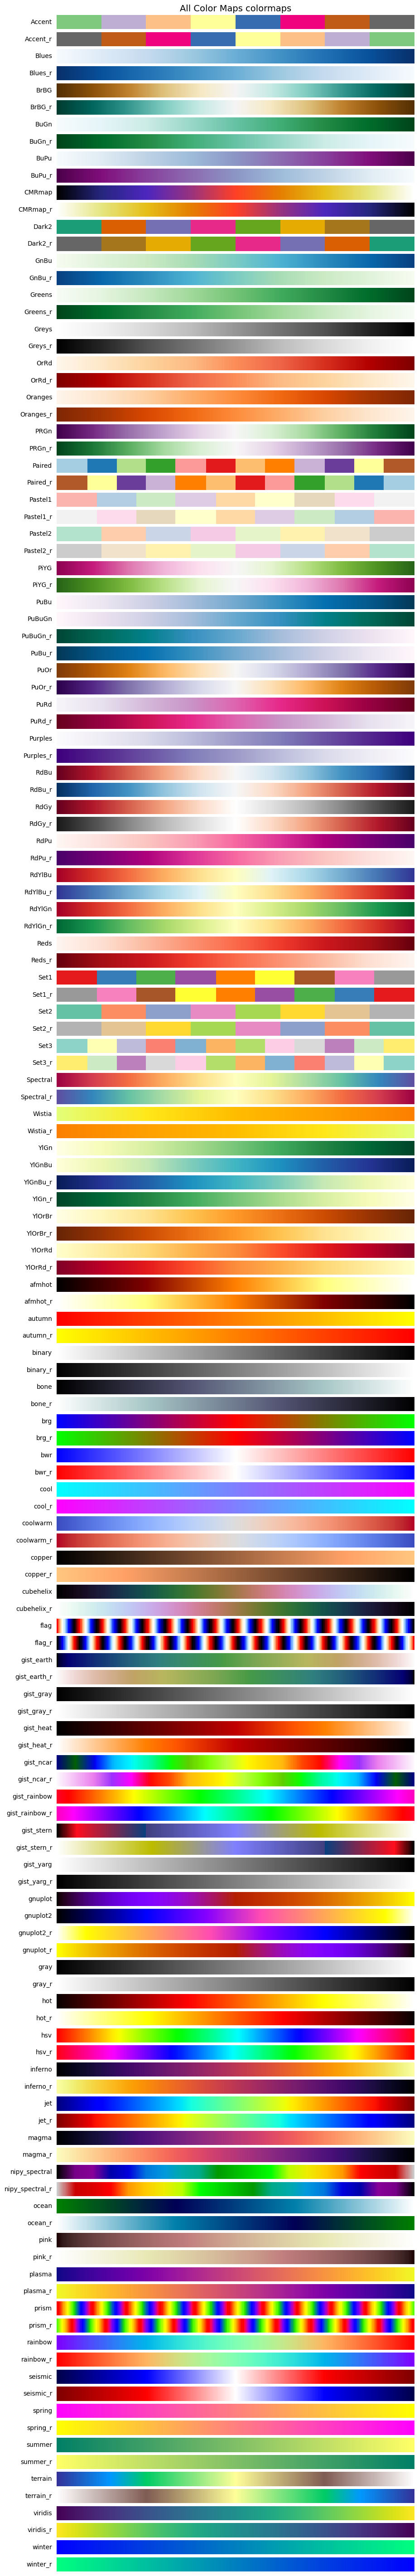

In [53]:
# Bringing in all colour maps for different palette options 

cmaps =  [('All Color Maps',
"Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, \
           BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, \
           Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, \
           Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, \
           Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, \
           PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, \
           RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, \
           Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral,\
           Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, \
           YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, \
           autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, \
           bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, \
           cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, \
           gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, \
           gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, \
           gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, \
           gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, \
           hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, \
           nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, \
           pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, \
           seismic, seismic_r, spring, spring_r, summer, summer_r, terrain, \
           terrain_r, viridis, viridis_r, winter, winter_r".replace(" ", "").split(',')
          )]
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    height = 0.4 * nrows
    fig, axes = plt.subplots(nrows=nrows, figsize=(10, height))
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:

    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show();

# code source: https://stackoverflow.com/questions/48114473/scaling-plot-sizes-with-matplotlib

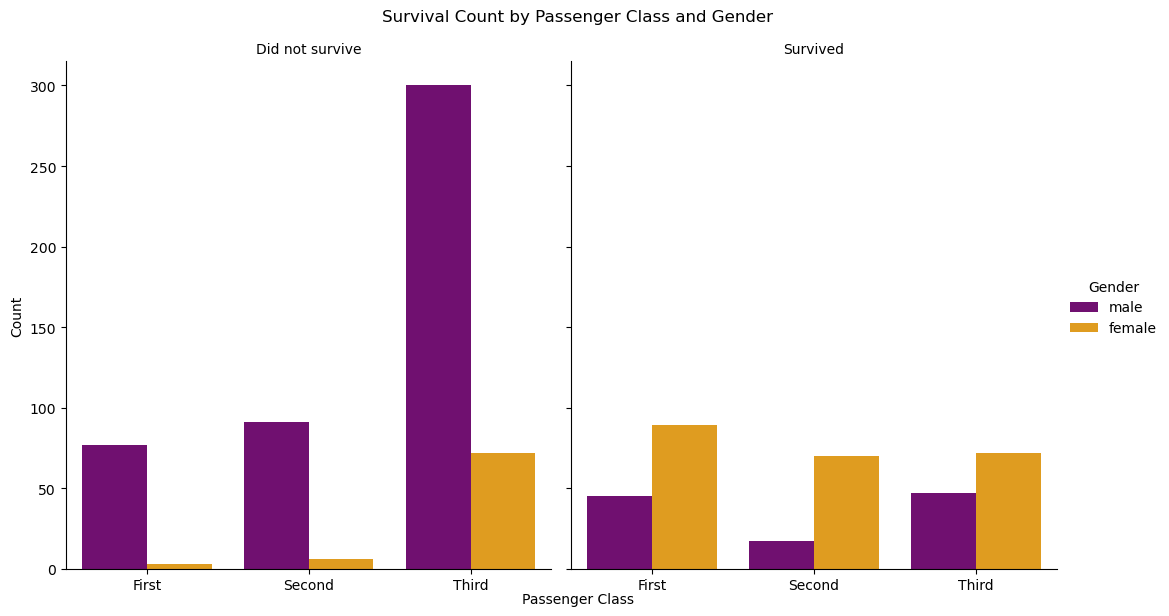

In [54]:
# Making a custom colour palette
# Colourblind friendly and non-gendered!
custom_colors = {"male": "purple", "female": "orange"}

g = sns.catplot(x="class", hue="sex", col="survived",
                data=titanic, kind="count", palette=custom_colors, height=6, aspect=0.9 )

# Axis
g.set_axis_labels("Passenger Class", "Count")

# Legend
g._legend.set_title("Gender")


# Main title
main_title = "Survival Count by Passenger Class and Gender"
g.fig.suptitle(main_title, y=1.03) #played around with y axis movement until it looked appropriate

# Changing top lables on graph (looked through seaborn.FacetGrid.set_titles documentation)
g.set_titles(col_template="{col_name}")

# Removing one of the labels from the facet grid so just one 'Passenger Class' is visible
g.set_xlabels("")
# Adding a new shared label for both grids with positional arguments decided through stackoverflow 
g.fig.text(0.5, 0.04,"Passenger Class", ha="center")


plt.show()




The above graph illustrates the survival rate disparities based on both passenger class and gender, providing a visual representation of the number of survivors among Titanic passengers. Initially, only passengers and their particular class were examined, along with how those factors affected survival rates. However, the introduction of the additional categorical variable of gender revealed a more comprehensive picture of how a passenger's chances of survival were influenced by both their gender and class.
     To create this graph, the original "survived" variable within the dataset was transformed into a string format to enhance visualisation. This meant replacing the original categories "true" and "false" with "Survived" and "Did not survive" for clarity when looking at these two variables on a graph. Furthermore, one of the x-axis labels was removed from the facet grid, so only a single ‘Passenger Class’ label was visible for a clearer visualisation. Likewise, this shared label was then moved with positional arguments to ensure a neater format. These visualisation choices were then complemented by an appropriately capitalised y-axis label and a meaningful title. Finally, a customised colour palette was created to achieve the colour scheme shown in the graph above. Purple and orange were purposefully chosen since they are not only accessible to colour-blind individuals but also stand out dramatically, improving the whole visual appearanc. (219 words)
 

__BLOCK TWO__

In [55]:
# Importing the required packages for spatial visualisations
import geopandas as gpd
import pyproj
import contextily as ctx

import geoplot as gplt
import geoplot.crs as gcrs

In [56]:
# Bringing in countries data
countries_path = gpd.datasets.get_path('naturalearth_lowres')
print(countries_path)

/Users/lillycrellin/anaconda3/envs/spatial_env/lib/python3.11/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp


In [57]:
# Bringing in spatial countries data
countries = gpd.read_file(countries_path)

In [58]:
# Exploring
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


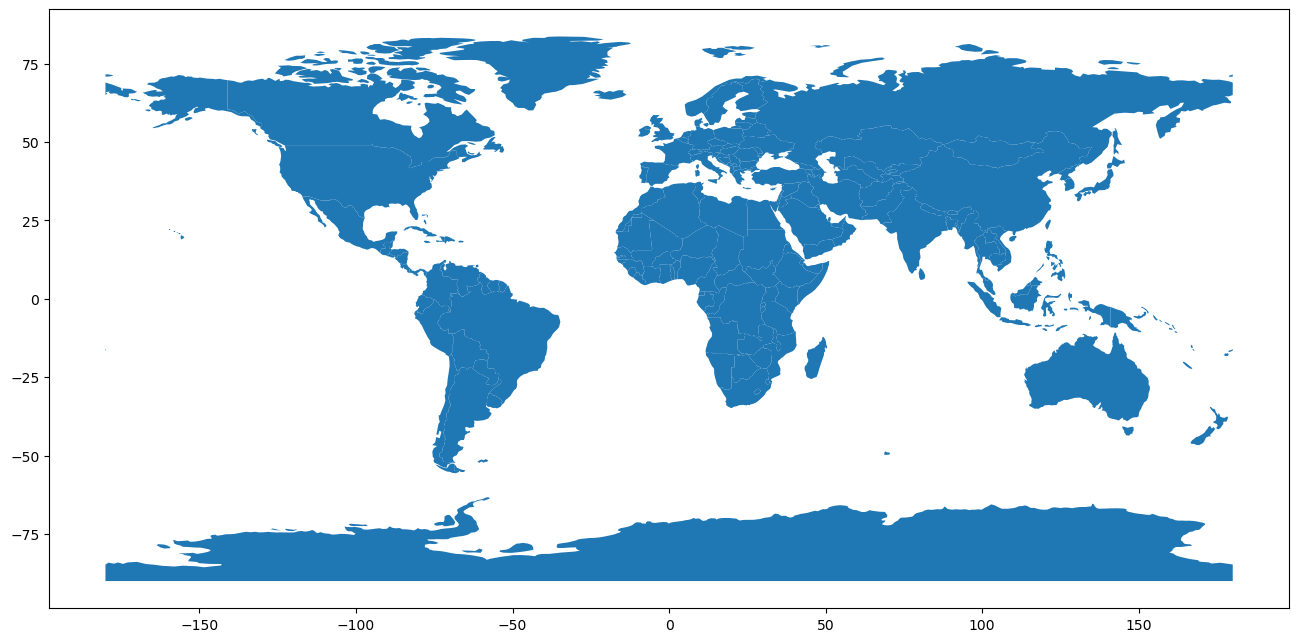

In [59]:
# Plotting countries to see how its looking 
f,ax = plt.subplots(1, figsize=(16, 8))
countries.plot(ax=ax)
plt.show()

In [60]:
countries.explore()

In [61]:
# Checking crs
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

__Cleaning Data__

In [62]:
# Subsetting
Asia= countries.loc[countries['continent']=='Asia']
# Viewing newly created Africa dataframe
Asia

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,1.851393e+07,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,3.358065e+07,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,2.706256e+08,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,1.293119e+06,Asia,Timor-Leste,TLS,2017,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,9.053300e+06,Asia,Israel,ISR,394652,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,6.855713e+06,Asia,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
79,4.685306e+06,Asia,Palestine,PSE,16276,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
83,1.010169e+07,Asia,Jordan,JOR,44502,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
84,9.770529e+06,Asia,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
85,2.832067e+06,Asia,Qatar,QAT,175837,"POLYGON ((50.81011 24.75474, 50.74391 25.48242..."


__Data Visualisation__

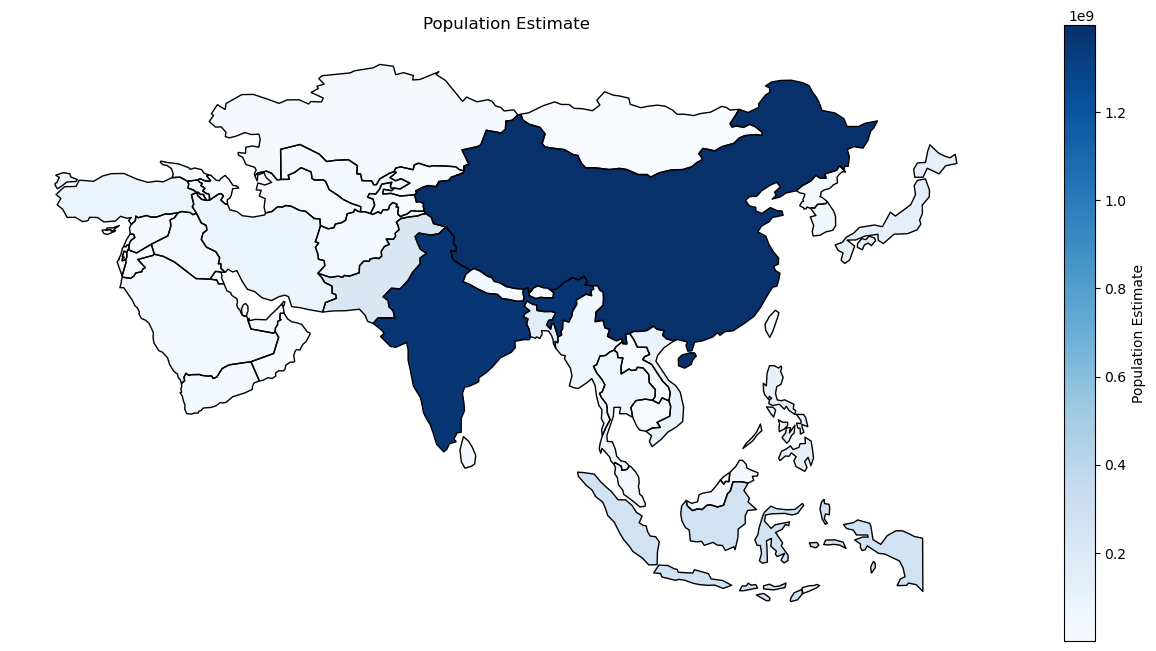

In [63]:
# Making a graph for population estimates 
# Plot size
f,ax = plt.subplots(1, figsize=(16,8))

# Ploting countries, and plotting population estimate
Asia.plot(ax=ax, column='pop_est', cmap='Blues', legend=True, legend_kwds={'label': "Population Estimate"})
# Legend title added using Geopandas 'Choro legends' section within 'Getting Started'

# Boundaries
Asia.boundary.plot(ax=ax, linewidth=1, color="black")

# Title
ax.set_title('Population Estimate')

# Turning axis off for cleaner visualisation
ax.set_axis_off()

# show the map
plt.show()

The population projection for Asia is shown in the graph above. The 'countries' dataset was subset to isolate population estimates for only Asia, allowing for a more specific visualisation that only highlights Asia, rather than the entire world. Several components were included in the graph to improve accessibility and comprehension. A legend title and main title were first made in order to provide clearer information, and the axis was removed for a cleaner visualisation. A suitable colour palette was then used to emphasise the variables continuous nature and optimise the visualisation of the data. Darker blue tones intentionally highlight higher population estimates, while lighter blue tones highlight lower population estimates. Blues were specifically chosen because they provide accessibility for viewers with colour vision impairments. Although the "Blues" colour palette is useful for emphasising population differences, it can occasionally make it challenging to distinguish the finer differences in smaller population estimates. Given this restriction, adding borders was considered as a useful tool for producing a thorough and understandable visualisation of the data. Because of this, the graph was visually enhanced by including black borders around each country. This was done to improve the visual contrast between the countries, particularly in cases where the lighter tones of the 'Blues' palette could otherwise make it difficult to differentiate between smaller population estimations. (219 words) 
